In [2]:
from flickplay.get_connections import get_pymysql_con, get_alchemy_con
from flickplay.mongo import get_mongo_db_obj
from flickplay import query
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from flickplay.utils import make_big


con = get_alchemy_con()

query = """

SELECT week, count(week) cnt FROM 
(
SELECT 
    x.*, 
    week(x.date) week 
FROM
    (
    SELECT 
        wallet_address, 
        min(date) date
    FROM 
        ( SELECT * FROM fpa.events WHERE event='profile_wallet__connect_suc') y
    GROUP BY
        wallet_address
    ) x
    ) z
GROUP BY week

"""

d=pd.read_sql(query, con)
d

,week,cnt
0,16,4
1,17,18
2,18,17
3,19,12
4,20,10
5,21,14
6,22,6
7,23,10
8,24,60
9,25,36


Text(0.5, 0, 'week 2022-2023')

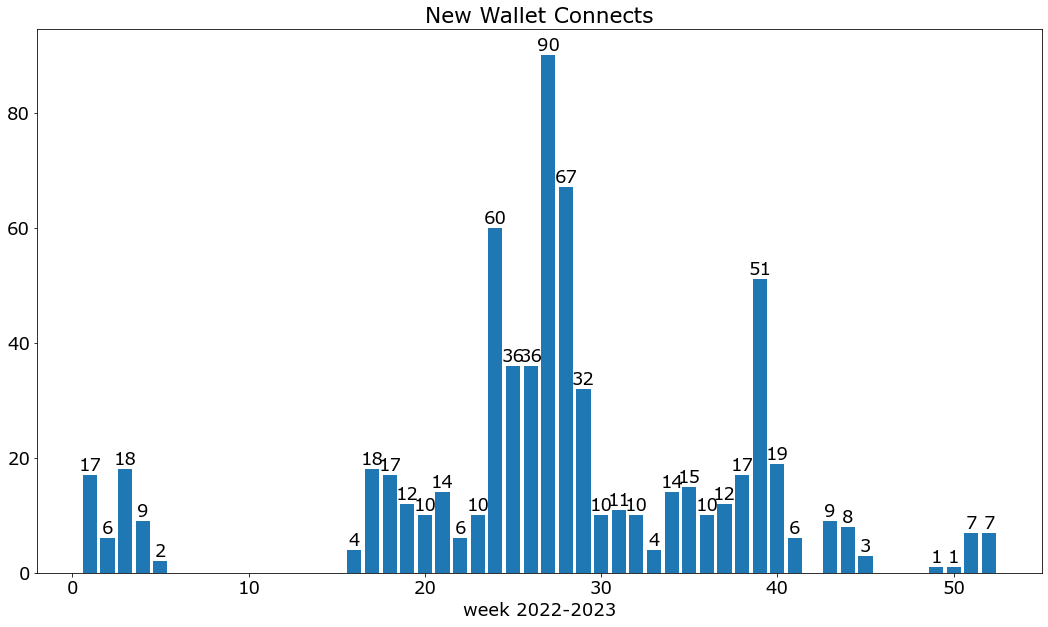

In [4]:
fig, ax = make_big()

barr = ax.bar(d.week, d.cnt)
ax.bar_label(barr,d.cnt)
plt.title('New Wallet Connects')
plt.xlabel('week 2022-2023')